In [1]:
import os
import pathlib
import math

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import src.utils.time
import src.utils.dict
import src.utils.comps
import src.utils.module
import src.utils.json

import src.comps.heads_pyramid_2

In [2]:
tab20_color_list =\
    [mpl.colormaps["tab20"](x) for x in (np.linspace(0, 1-1/20, 20) + 1/(2*20))[0::2]] +\
    [mpl.colormaps["tab20"](x) for x in (np.linspace(0, 1-1/20, 20) + 1/(2*20))[1::2]]

---

In [3]:
exp_data_all = {}

In [4]:
data_subdir_name = "ret_train"
backbone_name = "convnext_t"
exp_name_list = [
    "test_002"
]
    
#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "exp_data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [5]:
data_subdir_name = "ret_train_old_smpl"
backbone_name = "convnext_t_s1"
exp_name_list =\
    ["exp_{:03d}".format(exp_idx) for exp_idx in [0, 6]]

#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_1__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [6]:
data_subdir_name = "ret_train_old_smpl"
backbone_name = "swint_v2_t_s1"
exp_name_list =\
    ["exp_{:03d}".format(exp_idx) for exp_idx in [14]]
    
#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_1__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [7]:
data_subdir_name = "ret_train_old_smpl_2"
backbone_name = "convnext_t_s1"
exp_name_list =\
    ["head_{:03d}_exp_{:03d}".format(head_idx, exp_idx) for head_idx in [0, 6] for exp_idx in [10, 11, 12]]

#

if data_subdir_name not in exp_data_all.keys(): exp_data_all[data_subdir_name] = {}
exp_data_all[data_subdir_name][backbone_name] = {}

exp_dirname = os.path.join(pathlib.Path.home(), "data", "fashion_retrieval", data_subdir_name, backbone_name)

for exp_name in exp_name_list:

    exp_filename = os.path.join(exp_dirname, exp_name, "train_ret_DDP_stage_1__data.json")
    exp_data = src.utils.json.load_json_dict(exp_filename)

    exp_data_all[data_subdir_name][backbone_name][exp_name] = exp_data

In [8]:
exp_data_all.keys()

dict_keys(['ret_train', 'ret_train_old_smpl', 'ret_train_old_smpl_2'])

In [9]:
exp_data_all["ret_train"].keys()

dict_keys(['convnext_t'])

In [10]:
exp_data_all["ret_train_old_smpl"].keys()

dict_keys(['convnext_t_s1', 'swint_v2_t_s1'])

In [11]:
exp_data_all["ret_train_old_smpl_2"].keys()

dict_keys(['convnext_t_s1'])

In [12]:
exp_data_all["ret_train_old_smpl_2"]["convnext_t_s1"].keys()

dict_keys(['head_000_exp_010', 'head_000_exp_011', 'head_000_exp_012', 'head_006_exp_010', 'head_006_exp_011', 'head_006_exp_012'])

---

In [17]:
def plot_losses(
    exp_name_list,
    exp_data_list,
    head_idx,
    num_epochs=5
):

    fig, axs = plt.subplots(nrows=2, figsize=(20, 12))

    # ConvNeXt-T Baseline

    exp_data = exp_data_all["ret_train"]["convnext_t"]["test_002"]

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]][:num_epochs]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]][:num_epochs]

    finished = exp_data["results"]["stage_1"]["finished"]

    label_lines = []
    label_lines.append("Stage 1 Baseline")
    label_lines.append("ConvNeXt-T")
    label = "\n".join(label_lines)

    color = [0.66, 0.66, 0.66]

    axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, color=color, marker=".", linestyle="--")
    axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, color=color, marker=".", linestyle="--")

    # ConvNeXt-T + Fusion Baseline (0)

    exp_data = exp_data_all["ret_train_old_smpl"]["convnext_t_s1"]["exp_000"]

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]][:num_epochs]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]][:num_epochs]

    finished = exp_data["results"]["stage_1"]["finished"]

    label_lines = []
    label_lines.append("Stage 1 Baseline")
    label_lines.append("ConvNeXt-T + Fusion Head (BottomUp)")
    label = "\n".join(label_lines)

    color = [0.33, 0.33, 0.33]

    axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, color=color, marker=".", linestyle="--")
    axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, color=color, marker=".", linestyle="--")

    # ConvNeXt-T + Fusion Baseline (6)

    exp_data = exp_data_all["ret_train_old_smpl"]["convnext_t_s1"]["exp_006"]

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]][:num_epochs]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]][:num_epochs]

    finished = exp_data["results"]["stage_1"]["finished"]

    label_lines = []
    label_lines.append("Stage 1 Baseline")
    label_lines.append("ConvNeXt-T + Fusion Head (TopDown)")
    label = "\n".join(label_lines)

    color = [0.33, 0.33, 0.33]

    axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, color=color, marker=".", linestyle="--")
    axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, color=color, marker=".", linestyle="--")

    # SwinTV2-T Baseline

    exp_data = exp_data_all["ret_train_old_smpl"]["swint_v2_t_s1"]["exp_014"]

    train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]][:num_epochs]
    val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]][:num_epochs]

    finished = exp_data["results"]["stage_1"]["finished"]

    label_lines = []
    label_lines.append("Stage 1 Baseline")
    label_lines.append("SwinTransformerV2-T")
    label = "\n".join(label_lines)

    color = [0, 0, 0]

    axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, color="black", marker=".", linestyle="--")
    axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, color="black", marker=".", linestyle="--")

    # Experiments from ret_train_old_smpl_2/convnext_t_s1 with GLAM

    for exp_name, exp_data in zip(exp_name_list, exp_data_list):

        # Load data

        train_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["train_mean_loss_list"]]
        val_loss_list = [sum(l) for l in exp_data["results"]["stage_1"]["val_mean_loss_list"]]

        train_loss_list = train_loss_list[:min(num_epochs, len(train_loss_list))]
        val_loss_list = val_loss_list[:min(num_epochs, len(val_loss_list))]

        finished = exp_data["results"]["stage_1"]["finished"]
        base_lr = exp_data["settings"]["stage_1"]["optimizer"]["lr"]

        head_class = exp_data["settings"]["head"]["class"]

        # Title

        title_lines = []    
        title_lines.append("{:s}".format(exp_name))
        if math.isnan(train_loss_list[-1]):
            title_lines[-1] += " | NAN"
        elif not finished:
            title_lines[-1] += " | Unifinished"
        title_lines.append("ConvNeXt-T")
        title_lines.append("{:2s}".format(
            head_class
        ))
        title_lines.append("LR: {:s}".format(np.format_float_scientific(base_lr, min_digits=2, exp_digits=1)))

        label = "\n".join(title_lines)

        
        # Plot

        axs[0].plot(range(1, len(train_loss_list) + 1), train_loss_list, label=label, marker=".")
        axs[1].plot(range(1, len(val_loss_list) + 1), val_loss_list, label=label, marker=".")

    # Generic settings

    axs[0].set_yscale("log")
    axs[1].set_yscale("log")

    axs[0].grid()
    axs[1].grid()

    axs[0].set_title("Train loss")
    axs[1].set_title("Val loss")

    #plt.suptitle("Head {:d}".format(head_idx))
    plt.legend(prop={'family': 'monospace', "size": 13}, bbox_to_anchor=(1.05, 2.00))
    plt.show()

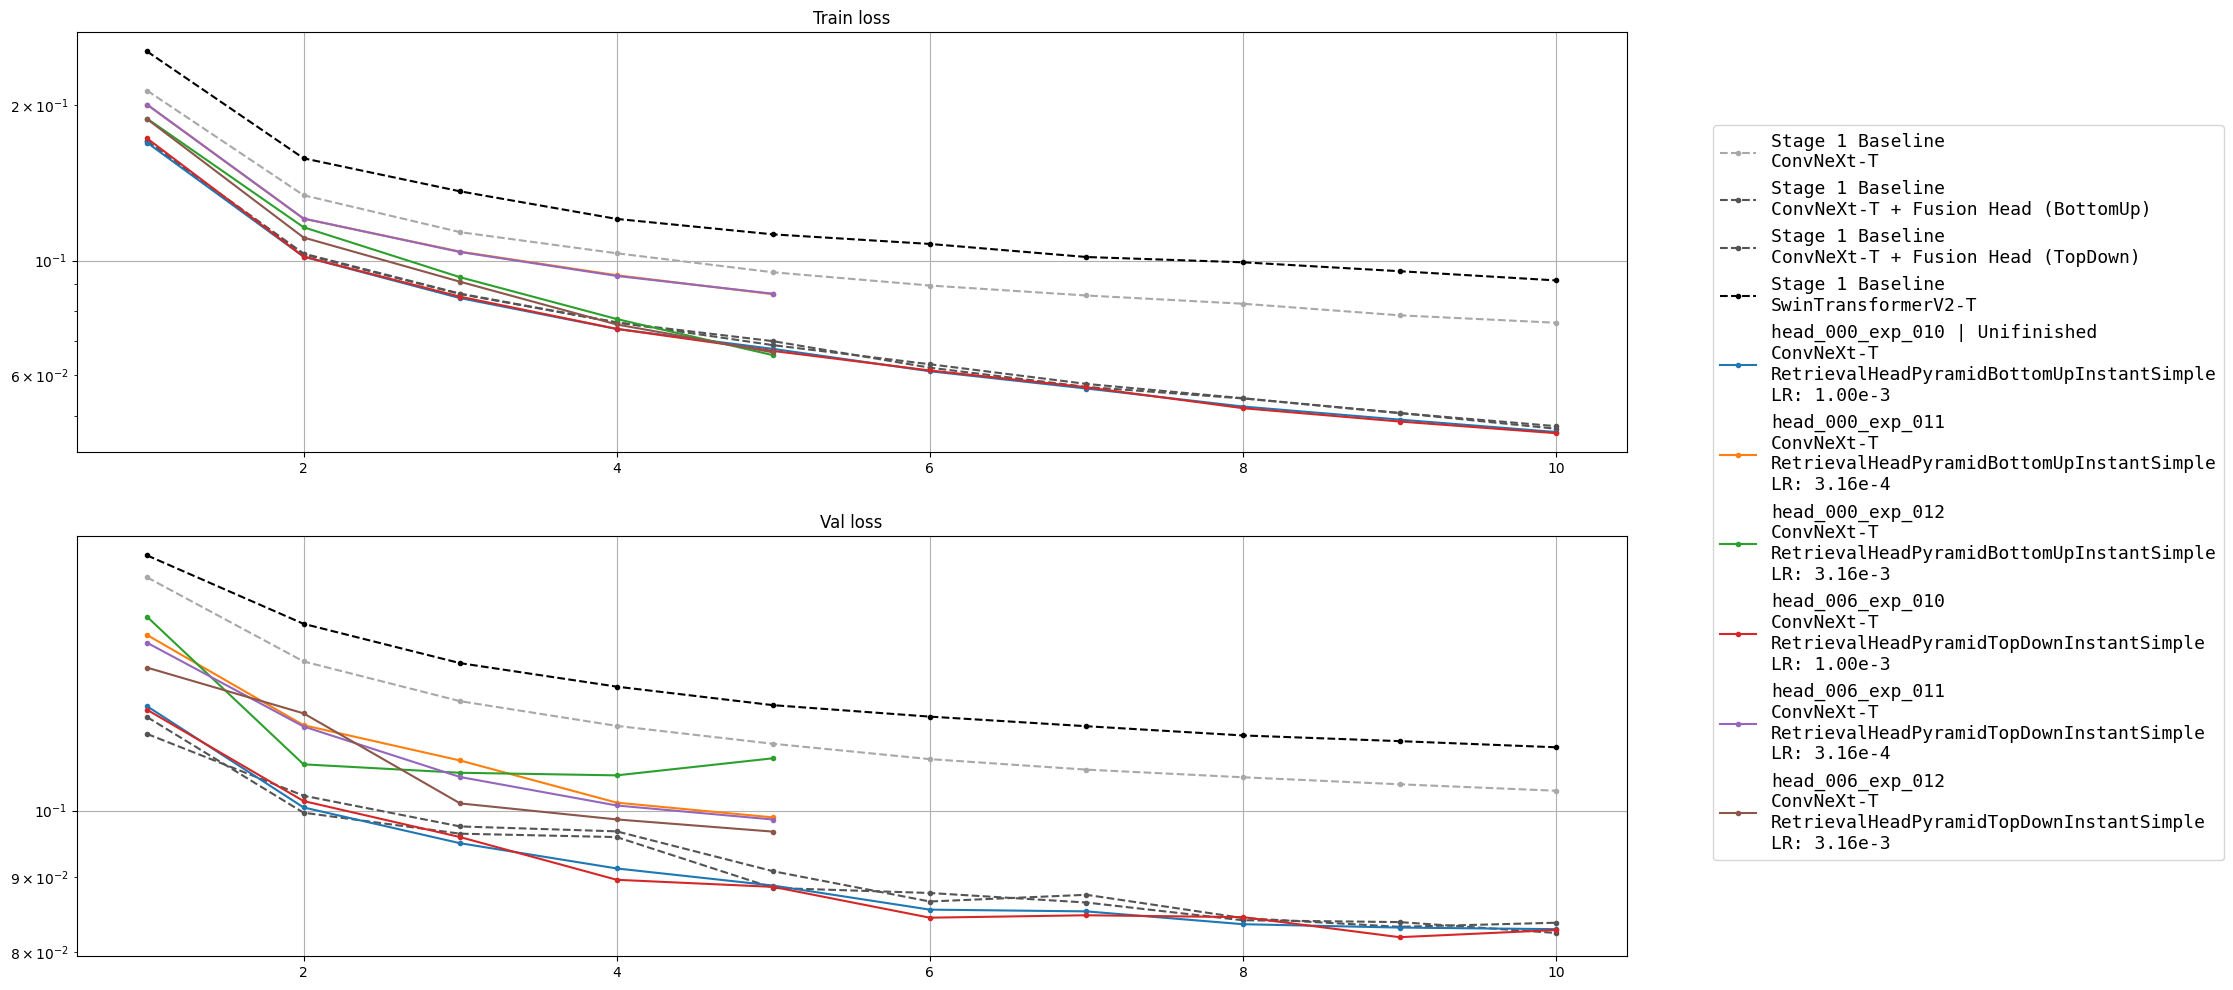

In [18]:
exp_name_list = ["head_{:03d}_exp_{:03d}".format(head_idx, exp_idx) for head_idx in [0, 6] for exp_idx in [10, 11, 12]]
exp_data_list = [exp_data_all["ret_train_old_smpl_2"]["convnext_t_s1"][key] for key in exp_name_list]

#

plot_losses(
    exp_name_list,
    exp_data_list,
    None,
    num_epochs=10
)